In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time

df = pd.read_csv('full_onion_data.csv')

In [2]:
df.shape

(2682, 10)

In [3]:
df.columns

Index(['Unnamed: 0', 'DISTRICT', 'MARKET', 'COMMODITY', 'VARIETY', 'GRADE',
       'MIN', 'MAX', 'MODAL', 'DATE'],
      dtype='object')

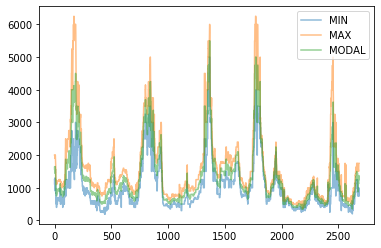

In [5]:
df = df.drop(['Unnamed: 0'], axis= 1)
df.plot(alpha=0.5, style='-')
plt.show()

In [18]:
df['DATE'] = df['DATE'].apply(lambda x: datetime.strptime(x, "%d %b %Y"))
df = df.set_index("DATE")
df['MODAL'] = df['MODAL'].apply(lambda x: int(x))
df['MIN'] = df['MIN'].apply(lambda x: int(x))
df['MAX'] = df['MAX'].apply(lambda x: int(x))

In [19]:
data1 = df.drop([ 'DISTRICT', 'MARKET', 'COMMODITY', 'VARIETY', 'GRADE',
       'MIN', 'MAX'], axis= 1)

In [20]:
data2 = df.drop([ 'DISTRICT', 'MARKET', 'COMMODITY', 'VARIETY', 'GRADE',
       'MIN', 'MODAL'], axis= 1)

In [21]:
data3 = df.drop([ 'DISTRICT', 'MARKET', 'COMMODITY', 'VARIETY', 'GRADE',
       'MODAL', 'MAX'], axis= 1)

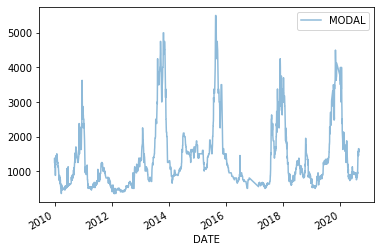

In [22]:
data1.plot(alpha=0.5, style='-')
plt.show()

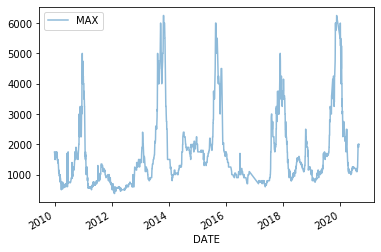

In [23]:
data2.plot(alpha=0.5, style='-')
plt.show()

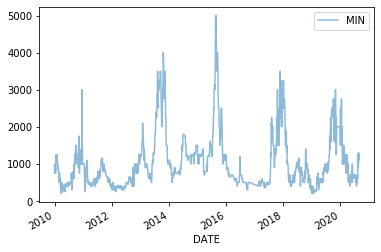

In [24]:
data3.plot(alpha=0.5, style='-')
plt.show()

In [25]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(data1['MODAL'], order=(2,0,0))
results = model.fit()

C:\Users\gagan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\gagan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


In [26]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  MODAL   No. Observations:                 2682
Model:                     ARMA(2, 0)   Log Likelihood              -16906.233
Method:                       css-mle   S.D. of innovations            132.150
Date:                Wed, 28 Oct 2020   AIC                          33820.467
Time:                        21:30:20   BIC                          33844.044
Sample:                             0   HQIC                         33828.996
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1329.4883    233.842      5.685      0.000     871.167    1787.810
ar.L1.MODAL     0.9549      0.019     49.488      0.000       0.917       0.993
ar.L2.MODAL     0.0346      0.019      1.791      0.073      -0.003       0.072
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0103           +0.0000j            1.0103            0.0000
AR.2          -28.6406           +0.0000j           28.6406            0.5000
-----------------------------------------------------------------------------
"""

In [28]:
data1i = data1.resample('1D').interpolate(method= "linear")

In [29]:
model = ARIMA(data1i['MODAL'], order=(2,0,0))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  MODAL   No. Observations:                 3896
Model:                     ARMA(2, 0)   Log Likelihood              -22791.740
Method:                       css-mle   S.D. of innovations             83.971
Date:                Wed, 28 Oct 2020   AIC                          45591.479
Time:                        21:32:48   BIC                          45616.550
Sample:                    01-01-2010   HQIC                         45600.378
                         - 08-31-2020                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1362.1652    286.367      4.757      0.000     800.896    1923.434
ar.L1.MODAL     1.1075      0.016     69.564      0.000       1.076       1.139
ar.L2.MODAL    -0.1120      0.016     -7.034      0.000      -0.143      -0.081
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0051           +0.0000j            1.0051            0.0000
AR.2            8.8841           +0.0000j            8.8841            0.0000
-----------------------------------------------------------------------------
"""

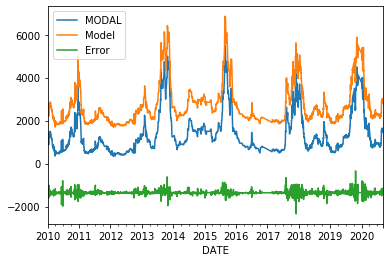

In [32]:
data1i['Model']=1362.1652+1.1075*data1i['MODAL'].shift(1)-0.1120*data1i['MODAL'].shift(2)
#Note that I had to remove the constant term because for some reason, it was giving garbage output
data1i['Error']=data1i['MODAL']-data1i['Model']
data1i.plot()
plt.show()

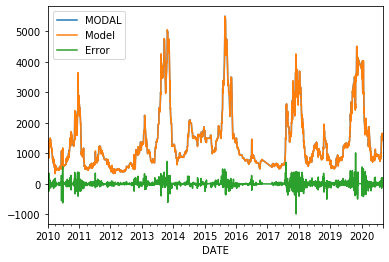

In [38]:
#Note that I had to remove the constant term because for some reason, it was giving a shifted output
#May be, this package has some issues/bugs...
#We may have to look for solving this in 'R'
data1i['Model']=1.1075*data1i['MODAL'].shift(1)-0.1120*data1i['MODAL'].shift(2)
data1i['Error']=data1i['MODAL']-data1i['Model']
data1i.plot()
plt.show()

In [39]:
data1i.describe()

,MODAL,Model,Error
count,3896.000000,3894.000000,3894.000000
mean,1362.165169,1356.006615,6.184063
std,965.227056,961.581966,83.980105
min,350.000000,338.625000,-982.000000
25%,700.000000,696.850000,-7.092187
50%,1025.000000,1017.743750,3.825000
75%,1575.480769,1570.712500,15.412500
max,5500.000000,5496.250000,1019.650000


In [40]:
print(f'Root Mean Squared Error for the model is ', np.sqrt(np.mean(data1i['Error']**2)))

Root Mean Squared Error for the model is  84.1967314327097


In [33]:
# I did a FFT analysis on the error, but didn't find any periodic component.

In [ ]:
# Try predicting the next few terms/forecast based on this model. 